In [1]:
# importing the modules
using Plots
using Printf
using CSV

In [2]:
# dataset
df = CSV.read("./knn-data.csv");

# train test split
df_train = df[1:80,:];
df_test = df[81:size(df)[1],:];

In [3]:
# size of the training and testing set
@printf("size of training set :(%d,%d)\n",size(df_train)[1],size(df_train)[2]);
@printf("size of testing set: (%d,%d)",size(df_test)[1],size(df_test)[2]);

size of training set :(80,3)
size of testing set: (20,3)

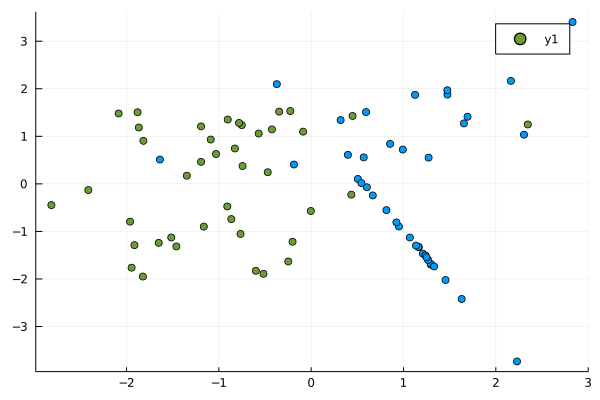

In [4]:
# plotting the training set
plot!(df_train[:,1],df_train[:,2],seriestype="scatter",color=df_train[:,3])

In [5]:
# make prediction
function calc_target(x1,x2)
    k = 5 # k value
    distance = []
    df_train_duplicate = df_train;
    
    # calculating euclidean distance between this point and the rest of the points in the dataframe
    for i in 1:size(df_train_duplicate)[1]
        euc = sqrt(((x1 - df_train_duplicate[i,1])^2)*((x2 - df_train_duplicate[i,2])^2)) 
        push!(distance,euc);
    end;
   
    # checking the first 5 points
    df_train_duplicate[:,4] = distance;
    sort!(df_train_duplicate,[:x4]);
    df_train_duplicate = df_train_duplicate[1:k,:];
    if(sum(df_train_duplicate[:,3]) > k/2)
        return 1;
    else
        return 0;
    end;
end;

In [6]:
# predicting the targets for all the values in the test set
y_hat = []
for i in 1:size(df_test)[1]
    push!(y_hat,calc_target(df_test[i,1],df_test[i,2]));
end;
df_test[:,4] = y_hat;
df_test

,x1,x2,y,x4
,Float64,Float64,Int64,Any
1,-0.4284,1.19157,0,0
2,0.276224,1.26075,1,0
3,-1.05901,-0.883366,0,0
4,-0.207218,0.100633,1,0
5,1.47693,-2.07542,1,1
6,-0.531655,-0.957579,0,0
7,-1.48235,0.697895,0,0
8,0.302623,1.031,1,1
9,-0.650899,1.23471,0,0


In [7]:
# accuracy of the model
@printf("Accuracy of the prediction: %d%c",(sum(df_test[:,3] .== df_test[:,4])/length(df_test[:,3]))*100,'%')

Accuracy of the prediction: 85%

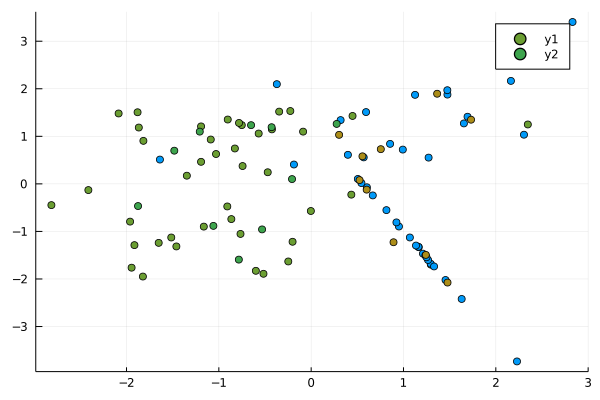

In [8]:
# replacing 0s with 3s and 1s with 4s for plotting purposes
for i in 1:size(df_test)[1]
    if df_test[i,4] == 0
        df_test[i,4] = 3;
    else
        df_test[i,4] = 5;
    end;
end;
plot!(df_test[:,1],df_test[:,2],seriestype="scatter",color=df_test[:,4])